___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___
# Question and Answer Chat Bots

----

------

## Loading the Data

We will be working with the Babi Data Set from Facebook Research.

Full Details: https://research.fb.com/downloads/babi/

- Jason Weston, Antoine Bordes, Sumit Chopra, Tomas Mikolov, Alexander M. Rush,
  "Towards AI-Complete Question Answering: A Set of Prerequisite Toy Tasks",
  http://arxiv.org/abs/1502.05698


In [1]:
import pickle
import numpy as np

In [2]:
with open ('C:/Users/ksa/Downloads/original/UPDATED_NLP_COURSE/06-Deep-Learning/train_qa.txt', 'rb') as f:
    train_data = pickle.load(f)

In [3]:
with open ('C:/Users/ksa/Downloads/original/UPDATED_NLP_COURSE/06-Deep-Learning/test_qa.txt', 'rb') as f:
    test_data = pickle.load(f)

----

## Exploring the Format of the Data

In [4]:
type(test_data)

list

In [5]:
type(train_data)

list

In [6]:
len(test_data)

1000

In [7]:
len(train_data)

10000

In [8]:
train_data[0]

(['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
 'no')

In [9]:
' '.join(train_data[0][0])

'Mary moved to the bathroom . Sandra journeyed to the bedroom .'

In [10]:
' '.join(train_data[0][1])

'Is Sandra in the hallway ?'

In [11]:
train_data[0][2]

'no'

-----

## Setting up Vocabulary of All Words

In [12]:
# Create a set that holds the vocab words
vocab = set()

In [13]:
all_data = test_data + train_data

In [14]:
for story, question , answer in all_data:
    # In case you don't know what a union of sets is:
    # https://www.programiz.com/python-programming/methods/set/union
    vocab = vocab.union(set(story))
    vocab = vocab.union(set(question))

In [15]:
vocab.add('no')
vocab.add('yes')

In [16]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [17]:
vocab_len = len(vocab) + 1 #we add an extra space to hold a 0 for Keras's pad_sequences

In [18]:
max_story_len = max([len(data[0]) for data in all_data])

In [19]:
max_story_len

156

In [20]:
max_question_len = max([len(data[1]) for data in all_data])

In [21]:
max_question_len

6

## Vectorizing the Data

In [22]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [23]:
# Reserve 0 for pad_sequences
vocab_size = len(vocab) + 1

-----------

In [24]:
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

Using TensorFlow backend.
C:\Users\ksa\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ksa\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\ksa\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\ksa\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529: Fu

In [25]:
# integer encode sequences of words
tokenizer = Tokenizer(filters=[])
tokenizer.fit_on_texts(vocab)

In [26]:
tokenizer.word_index

{'grabbed': 1,
 'is': 2,
 'back': 3,
 '?': 4,
 'there': 5,
 'yes': 6,
 'to': 7,
 'milk': 8,
 'got': 9,
 'football': 10,
 'dropped': 11,
 'kitchen': 12,
 'the': 13,
 'left': 14,
 'took': 15,
 'office': 16,
 'put': 17,
 'sandra': 18,
 'in': 19,
 'hallway': 20,
 'no': 21,
 'up': 22,
 'journeyed': 23,
 'down': 24,
 'garden': 25,
 'bedroom': 26,
 'discarded': 27,
 'travelled': 28,
 'moved': 29,
 'went': 30,
 'mary': 31,
 'apple': 32,
 'john': 33,
 '.': 34,
 'bathroom': 35,
 'daniel': 36,
 'picked': 37}

In [31]:
# word_index = tokenizer.word_index

### Functionalize Vectorization

In [32]:
def vectorize_stories(data, word_index=tokenizer.word_index, max_story_len=max_story_len,max_question_len=max_question_len):
    '''
    INPUT: 
    
    data: consisting of Stories,Queries,and Answers
    word_index: word index dictionary from tokenizer
    max_story_len: the length of the longest story (used for pad_sequences function)
    max_question_len: length of the longest question (used for pad_sequences function)


    OUTPUT:
    
    Vectorizes the stories,questions, and answers into padded sequences. We first loop for every story, query , and
    answer in the data. Then we convert the raw words to an word index value. Then we append each set to their appropriate
    output list. Then once we have converted the words to numbers, we pad the sequences so they are all of equal length.
    
    Returns this in the form of a tuple (X,Xq,Y) (padded based on max lengths)
    '''
    
    
    # X = STORIES
    X = []
    # Xq = QUERY/QUESTION
    Xq = []
    # Y = CORRECT ANSWER
    Y = []
    
    
    for story, query, answer in data:
        
        # Grab the word index for every word in story
        x = [word_index[word.lower()] for word in story]
        # Grab the word index for every word in query
        xq = [word_index[word.lower()] for word in query]
        
        # Grab the Answers (either Yes/No so we don't need to use list comprehension here)
        # Index 0 is reserved so we're going to use + 1
        y = np.zeros(len(word_index) + 1)
        
        # Now that y is all zeros and we know its just Yes/No , we can use numpy logic to create this assignment
        #
        y[word_index[answer]] = 1
        
        # Append each set of story,query, and answer to their respective holding lists
        X.append(x)
        Xq.append(xq)
        Y.append(y)
        
    # Finally, pad the sequences based on their max length so the RNN can be trained on uniformly long sequences.
        
    # RETURN TUPLE FOR UNPACKING
    return (pad_sequences(X, maxlen=max_story_len),pad_sequences(Xq, maxlen=max_question_len), np.array(Y))

In [34]:
inputs_train, queries_train, answers_train = vectorize_stories(train_data)

In [36]:
inputs_test, queries_test, answers_test = vectorize_stories(test_data)

In [38]:
inputs_train

array([[ 0,  0,  0, ..., 13, 26, 34],
       [ 0,  0,  0, ..., 13, 20, 34],
       [ 0,  0,  0, ..., 13, 35, 34],
       ...,
       [ 0,  0,  0, ..., 13, 26, 34],
       [ 0,  0,  0, ...,  8,  5, 34],
       [ 0,  0,  0, ..., 32,  5, 34]])

In [42]:
answers_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [45]:
tokenizer.word_index['yes']

6

In [46]:
tokenizer.word_index['no']

21

In [48]:
sum(answers_test)

array([  0.,   0.,   0.,   0.,   0.,   0., 497.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 503.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.])

# Creating the Model
1. Build the Network:

    a) Input Encoder M    
    b) Input Encoder C    
    c) Question Encoder
    
    
2. Complete the Network

In [50]:
from keras.models import Sequential, Model
from keras.layers.embeddings import Embedding
from keras.layers import Input, Activation, Dense, Permute, Dropout
from keras.layers import add, dot, concatenate
from keras.layers import LSTM

In [54]:
# STEP 1-  Create placeholders for both the inputs - story and questions
input_sequence = Input((max_story_len,))
question = Input((max_question_len,))

In [58]:
# STEP 2- VOCAB
vocab_size = len(vocab) + 1

## ENCODERS

### Input Encoder m

In [59]:
# STEP 3 - Input Encoder m with output dim = 64
# Create INPUT ENCODER M
input_encoder_m = Sequential()
input_encoder_m.add(Embedding(input_dim = vocab_size, output_dim = 64))

# Dropout layer - turns off percentage of neurons during training - so 0.5 means 50% of neurons are random turned off
input_encoder_m.add(Dropout(0.3))

# This encoder will output:
# (samples, story_maxlen, embedding_dim)

### Input Encoder c

In [60]:
# STEP 3 - Input Encoder c with output dim = max_question_len
# Create INPUT ENCODER M
input_encoder_c = Sequential()
input_encoder_c.add(Embedding(input_dim = vocab_size, output_dim = max_question_len))

# Dropout layer - turns off percentage of neurons during training - so 0.5 means 50% of neurons are random turned off
input_encoder_c.add(Dropout(0.3))

# This encoder will output:
# (samples, story_maxlen, max_question_len)

### Question Encoder

In [66]:
# embed the question into a sequence of vectors
question_encoder = Sequential()
question_encoder.add(Embedding(input_dim=vocab_size,
                               output_dim=64,
                               input_length=max_question_len))
question_encoder.add(Dropout(0.3))
# output: (samples, query_maxlen, embedding_dim)

## Encode the Sequences

In [67]:
# Time to pass the placeholders (input sequence and question) through the encoders
input_encoded_m = input_encoder_m(input_sequence)
input_encoded_c = input_encoder_c(input_sequence)
question_encoded = question_encoder(question)

##### Use dot product to compute the match between first input vector seq and the query

In [65]:
# match the question with the input (search for question match) and then do a dot product
match = dot([input_encoded_m, question_encoded], axes = (2,2))
match = Activation('softmax')(match)

#### Add this match matrix with the second input vector sequence

In [69]:
# add the match matrix with the second input vector sequence
response = add([match, input_encoded_c])
response = Permute((2,1))(response)

In [71]:
# concatenate the match matrix with the question vector sequence
answer = concatenate([response, question_encoded])

In [72]:
answer

<tf.Tensor 'concatenate_2/concat:0' shape=(?, 6, 220) dtype=float32>

In [73]:
# Reduce with RNN (LSTM)
answer = LSTM(32)(answer)  # (samples, 32)

In [74]:
# Regularization with Dropout
answer = Dropout(0.5)(answer)
answer = Dense(vocab_size)(answer)  # (samples, vocab_size)

In [80]:
# we output a probability distribution over the vocabulary
answer = Activation('softmax')(answer)

In [82]:
# build the final model
Model = Model([input_sequence, question], answer)
Model.compile(optimizer='rmsprop', loss='categorical_crossentropy',
              metrics=['accuracy'])

In [84]:
Model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 156)          0                                            
__________________________________________________________________________________________________
input_5 (InputLayer)            (None, 6)            0                                            
__________________________________________________________________________________________________
sequential_3 (Sequential)       multiple             2432        input_4[0][0]                    
__________________________________________________________________________________________________
sequential_6 (Sequential)       (None, 6, 64)        2432        input_5[0][0]                    
____________________________________________________________________________________________

In [86]:
# Model train
history = Model.fit([inputs_train, queries_train], answers_train,batch_size=32,epochs=120,validation_data=([inputs_test, queries_test], answers_test))

Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Train on 10000 samples, validate on 1000 samples
Epoch 1/120
10000/10000 [==============================] - 6s 588us/step - loss: 0.9122 - accuracy: 0.4902 - val_loss: 0.7007 - val_accuracy: 0.4970
Epoch 2/120
10000/10000 [==============================] - 5s 461us/step - loss: 0.7041 - accuracy: 0.4998 - val_loss: 0.6933 - val_accuracy: 0.5030
Epoch 3/120
10000/10000 [==============================] - 6s 581us/step - loss: 0.6958 - accuracy: 0.5034 - val_loss: 0.6968 - val_accuracy: 0.4970
Epoch 4/120
10000/10000 [==============================] - 5s 507us/step - loss: 0.6952 - accuracy: 0.4947 - val_loss: 0.6932 - val_accuracy: 0.5030
Epoch 5/120
10000/10000 [==============================] - 5s 473us/step - loss: 0.6945 - accuracy: 0.5035 - val_loss: 0.6935 - val_accuracy: 0.4970
Epoch 6/120
10000/10000 [==============================] - 5s 463us/step - loss:

10000/10000 [==============================] - 6s 594us/step - loss: 0.2790 - accuracy: 0.8759 - val_loss: 0.3486 - val_accuracy: 0.8310
Epoch 52/120
10000/10000 [==============================] - 6s 644us/step - loss: 0.2800 - accuracy: 0.8753 - val_loss: 0.3701 - val_accuracy: 0.8370
Epoch 53/120
10000/10000 [==============================] - 5s 474us/step - loss: 0.2776 - accuracy: 0.8775 - val_loss: 0.3680 - val_accuracy: 0.8390
Epoch 54/120
10000/10000 [==============================] - 6s 583us/step - loss: 0.2767 - accuracy: 0.8768 - val_loss: 0.3619 - val_accuracy: 0.8360
Epoch 55/120
10000/10000 [==============================] - 5s 476us/step - loss: 0.2773 - accuracy: 0.8772 - val_loss: 0.3675 - val_accuracy: 0.8400
Epoch 56/120
10000/10000 [==============================] - 5s 499us/step - loss: 0.2734 - accuracy: 0.8783 - val_loss: 0.3700 - val_accuracy: 0.8370
Epoch 57/120
10000/10000 [==============================] - 6s 554us/step - loss: 0.2753 - accuracy: 0.8793 - val

10000/10000 [==============================] - 6s 577us/step - loss: 0.2305 - accuracy: 0.8965 - val_loss: 0.4697 - val_accuracy: 0.8270
Epoch 106/120
10000/10000 [==============================] - 6s 552us/step - loss: 0.2257 - accuracy: 0.8983 - val_loss: 0.5072 - val_accuracy: 0.8210
Epoch 107/120
10000/10000 [==============================] - 5s 530us/step - loss: 0.2284 - accuracy: 0.8971 - val_loss: 0.4851 - val_accuracy: 0.8360
Epoch 108/120
10000/10000 [==============================] - 5s 482us/step - loss: 0.2227 - accuracy: 0.8985 - val_loss: 0.5391 - val_accuracy: 0.8260
Epoch 109/120
10000/10000 [==============================] - 5s 502us/step - loss: 0.2241 - accuracy: 0.9006 - val_loss: 0.4836 - val_accuracy: 0.8240
Epoch 110/120
10000/10000 [==============================] - 5s 504us/step - loss: 0.2257 - accuracy: 0.9015 - val_loss: 0.4995 - val_accuracy: 0.8260
Epoch 111/120
10000/10000 [==============================] - 5s 531us/step - loss: 0.2150 - accuracy: 0.8995

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


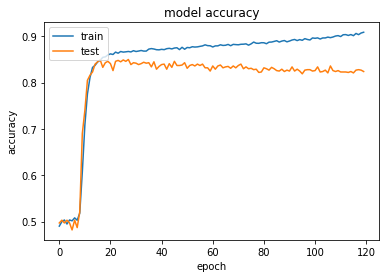

In [88]:
import matplotlib.pyplot as plt
%matplotlib inline
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [91]:
pred_results = Model.predict(([inputs_test, queries_test]))

In [95]:
' '.join(test_data[0][0])

'Mary got the milk there . John moved to the bedroom .'

In [96]:
test_data[0][1]

['Is', 'John', 'in', 'the', 'kitchen', '?']

In [97]:
test_data[0][2]

'no'

In [90]:
#Generate prediction from model for first story - to check the predicted accuracy against above element
val_max = np.argmax(pred_results[0])

for key, val in tokenizer.word_index.items():
    if val == val_max:
        k = key

print("Predicted answer is: ", k)
print("Probability of certainty was: ", pred_results[0][val_max])

Predicted answer is:  no
Probability of certainty was:  0.9999974
